## Members



*   Abdelrahman Elsayed
*   Mohamed Amr
*   Omar Tarek





## Setup

In [ ]:
!pip install datasets

## Imports

In [ ]:
from datasets import load_dataset
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import GlobalAveragePooling2D,LSTM,Concatenate, Embedding, Dense, Dropout, Input, add,Reshape,Flatten
from tensorflow.keras.models import Model
import numpy as np
from PIL import Image
import keras.preprocessing.image as image

# 1. Dataset Preparation

## Loading Dataset

In [ ]:
dataset = load_dataset("jxie/flickr8k")

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'caption_0', 'caption_1', 'caption_2', 'caption_3', 'caption_4'],
        num_rows: 6000
    })
    validation: Dataset({
        features: ['image', 'caption_0', 'caption_1', 'caption_2', 'caption_3', 'caption_4'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['image', 'caption_0', 'caption_1', 'caption_2', 'caption_3', 'caption_4'],
        num_rows: 1000
    })
})

## Preprocessing

In [ ]:
col_names = ["train", "validation", "test"]

### Images Loading & Preprocessing

In [ ]:
dataset["train"]

Dataset({
    features: ['image', 'caption_0', 'caption_1', 'caption_2', 'caption_3', 'caption_4'],
    num_rows: 6000
})

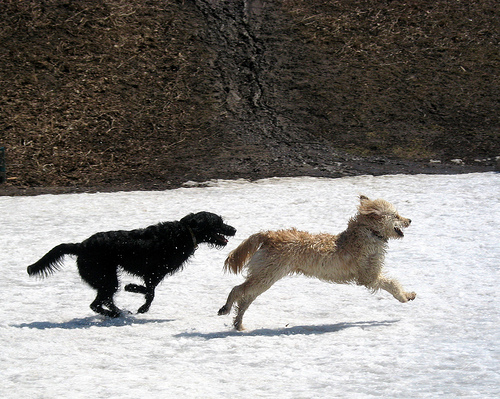

In [ ]:
# means: from the training dataset get the 0th row and image column
dataset["train"][0]["image"]

### Getting Average Width & Height

In [ ]:
width_dict = {}
for col in col_names:
  for i in range(len(dataset[col])):
    w = dataset[col][i]["image"].width
    if w not in width_dict:
      width_dict[w] = 1
    else:
      width_dict[w] += 1
sorted(width_dict.items(), key=lambda item:item[1], reverse=True)

# averaging the top 6 frequent widths
# we get ~ 469 px width

[(500, 5574),
 (333, 648),
 (375, 422),
 (334, 169),
 (332, 110),
 (400, 94),
 (357, 39),
 (335, 36),
 (480, 24),
 (330, 17),
 (331, 16),
 (336, 13),
 (354, 12),
 (399, 11),
 (374, 11),
 (381, 10),
 (341, 10),
 (346, 10),
 (367, 10),
 (376, 9),
 (326, 9),
 (415, 9),
 (356, 9),
 (338, 9),
 (447, 8),
 (446, 8),
 (355, 8),
 (361, 8),
 (384, 8),
 (320, 8),
 (380, 8),
 (360, 7),
 (362, 7),
 (359, 7),
 (347, 7),
 (363, 7),
 (328, 7),
 (450, 7),
 (358, 7),
 (319, 7),
 (345, 7),
 (317, 7),
 (343, 7),
 (351, 7),
 (281, 7),
 (389, 6),
 (311, 6),
 (348, 6),
 (475, 6),
 (494, 6),
 (478, 6),
 (365, 6),
 (382, 6),
 (469, 6),
 (420, 6),
 (373, 6),
 (353, 6),
 (401, 6),
 (300, 5),
 (486, 5),
 (432, 5),
 (372, 5),
 (306, 5),
 (302, 5),
 (477, 5),
 (426, 5),
 (368, 5),
 (325, 5),
 (329, 5),
 (370, 5),
 (349, 5),
 (461, 5),
 (337, 5),
 (405, 5),
 (318, 5),
 (449, 5),
 (366, 5),
 (324, 5),
 (352, 5),
 (402, 5),
 (468, 5),
 (429, 5),
 (479, 5),
 (398, 5),
 (438, 4),
 (433, 4),
 (322, 4),
 (441, 4),
 (408, 

In [ ]:
height_dict = {}
for col in col_names:
  for i in range(len(dataset[col])):
    h = dataset[col][i]["image"].height
    if h not in height_dict:
      height_dict[h] = 1
    else:
      height_dict[h] += 1
sorted(height_dict.items(), key=lambda item:item[1], reverse=True)
# averaging the top 8 frequent heights
# we get ~ 410 px height

### Average Aspect Ratio

In [ ]:
ratio_dict = {}
for col in col_names:
  for i in range(len(dataset[col])):
    r = dataset[col][i]["image"].width / dataset[col][i]["image"].height
    if r not in ratio_dict:
      ratio_dict[r] = 1
    else:
      ratio_dict[r] += 1
sorted_ratios = sorted(ratio_dict.items(), key=lambda item:item[1], reverse=True)
curr_ratio_index = 0
count_sum = 0
average_ratio = 0
while sorted_ratios[curr_ratio_index][1] >= 50:
  count_sum += sorted_ratios[curr_ratio_index][1]
  average_ratio += sorted_ratios[curr_ratio_index][0] * sorted_ratios[curr_ratio_index][1]
  curr_ratio_index += 1
average_ratio /= count_sum


In [ ]:
print(average_ratio)
print(sorted_ratios)

### Resizing Images

In [ ]:
# TODO: resize images
def resize_images(dataset, w, h):
  pass

#### Experiments

In [ ]:
dataset["train"][6]["image"]

In [ ]:
dataset["train"][6]["image"].resize((470, 410))

In [ ]:
dataset["train"][6]["image"].resize((500, 500))

In [ ]:
dataset["train"][6]["image"].resize((400, int(400 / average_ratio)))

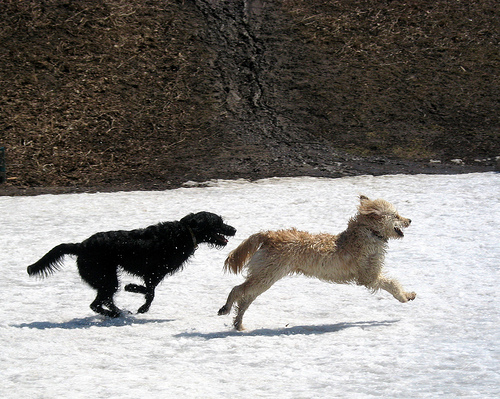

In [ ]:
dataset["train"][0]["image"]

In [ ]:
dataset["train"][0]["image"].resize((470, 410))

In [ ]:
dataset["train"][0]["image"].resize((500, 500))

In [ ]:
dataset["train"][0]["image"].resize((400, int(400 / average_ratio)))

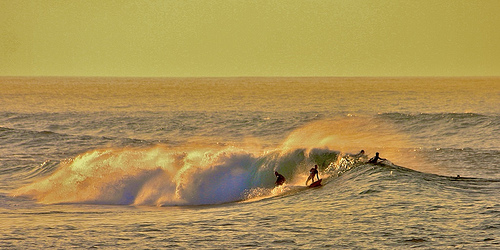

In [ ]:
dataset["train"][80]["image"]

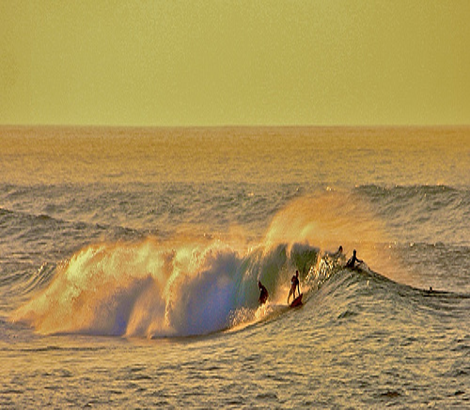

In [ ]:
dataset["train"][80]["image"].resize((470, 410))

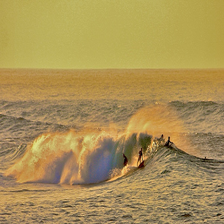

In [ ]:
dataset["train"][80]["image"].resize((224, 224))

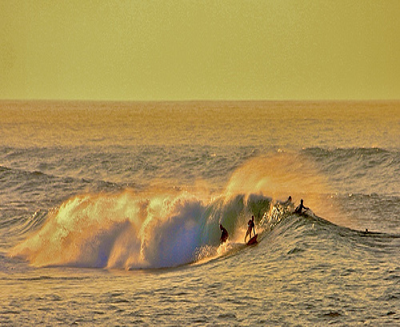

In [ ]:
dataset["train"][80]["image"].resize((400, int(400 / average_ratio)),3)

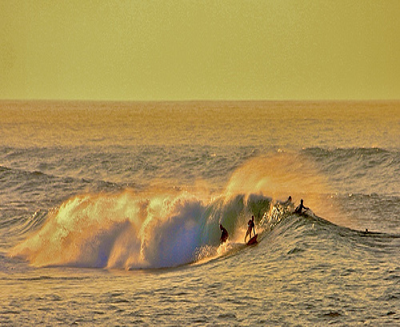

In [ ]:
dataset["train"][80]["image"].resize((400, int(400 / average_ratio)))

### Preparing Captions

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'caption_0', 'caption_1', 'caption_2', 'caption_3', 'caption_4'],
        num_rows: 6000
    })
    validation: Dataset({
        features: ['image', 'caption_0', 'caption_1', 'caption_2', 'caption_3', 'caption_4'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['image', 'caption_0', 'caption_1', 'caption_2', 'caption_3', 'caption_4'],
        num_rows: 1000
    })
})

### CNN

In [ ]:
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3),pooling = 'avg')
resnet.summary()
def preprocess_image(index, mode):
  im = dataset[mode][index]["image"].resize((224, 224))
  im = image.img_to_array(im)
  im = np.expand_dims(im, axis = 0 )
  return im


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_12 (InputLayer)       [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_12[0][0]']            
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
#features extraction
#train data
def ex_features(mode,size):
  train_data_pred = dict()
  for index in range(size):
    im = preprocess_image(index,mode)
    pred = resnet.predict(im).reshape(2048)
    train_data_pred[index] = pred
  return train_data_pred


In [ ]:
train_data_pred = ex_features('train',6000)
print(train_data_pred[1])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 168ms/step
[0.01809881 0.18382135 0.06795215 ... 0.02941403 0.15943363 0.38960606]


#### Tokenization

In [ ]:
def load_description():
  mapping = dict()
  count = 0
  for row in dataset['train']:
    mapping[count] = list()
    img_desc = list()
    img_desc.append(row['caption_0'])
    img_desc.append(row['caption_1'])
    img_desc.append(row['caption_2'])
    img_desc.append(row['caption_3'])
    img_desc.append(row['caption_4'])
    mapping[count] = img_desc
    count += 1
  return mapping


In [ ]:
mapping = load_description()
print((mapping))

{0: ['A black dog is running after a white dog in the snow .', 'Black dog chasing brown dog through snow', 'Two dogs chase each other across the snowy ground .', 'Two dogs play together in the snow .', 'Two dogs running through a low lying body of water .'], 1: ['A little baby plays croquet .', 'A little girl plays croquet next to a truck .', 'The child is playing croquette by the truck .', 'The kid is in front of a car with a put and a ball .', 'The little boy is playing with a croquet hammer and ball beside the car .'], 2: ['A brown dog in the snow has something hot pink in its mouth .', 'A brown dog in the snow holding a pink hat .', 'A brown dog is holding a pink shirt in the snow .', 'A dog is carrying something pink in its mouth while walking through the snow .', 'A dog with something pink in its mouth is looking forward .'], 3: ['A brown dog is running along a beach .', 'A brown dog wearing a black collar running across the beach .', 'A dog walks on the sand near the water .', '

In [ ]:
import string
# format the description for be suitable to the model
def format_description(desc):
  #prepare for remove punctuation
  nopunc = str.maketrans('', '', string.punctuation)
  for key, captions in desc.items():
    for i in range(len(captions)):
      caption = captions[i]
      # tokenize
      caption = caption.split()
      # convert to lower case
      caption = [word.lower() for word in caption]
      # remove punctuation
      caption = [w.translate(nopunc) for w in caption]
      # remove 's , 'a'
      caption = [word for word in caption if len(word) > 1]
      # remove tokens with numbers
      caption = [word for word in caption if word.isalpha()]
      captions[i] = ' '.join(caption)

In [ ]:
format_description(mapping)

In [ ]:
#make dictionary
def to_vocabulary(desc,index):
  vocabulary = set()
  for key in desc.keys():
    # use one caption for image
    vocabulary.update(desc[key][index].split())
  return vocabulary

In [ ]:
vocabulary = to_vocabulary(mapping,0)
print(len(vocabulary))

In [ ]:
# build map contain first caption
def map_one_caption(desc):
  mapping1 = dict()
  # count = 0
  for key, captions in desc.items():
    mapping1[key] = captions[0]
    # count +=1
    # if count == 100:
    #   break
  return mapping1

In [ ]:
map_one = map_one_caption(mapping)
print(map_one)

In [ ]:
# to handle the formate for RNN model
def formate_RNN(desc):
  for key,caption in desc.items():
    caption = 'startseq '+caption+' endseq'
    desc[key] = caption

In [ ]:
formate_RNN(map_one)
print(map_one)

{0: 'startseq black dog is running after white dog in the snow endseq', 1: 'startseq little baby plays croquet endseq', 2: 'startseq brown dog in the snow has something hot pink in its mouth endseq', 3: 'startseq brown dog is running along beach endseq', 4: 'startseq black and white dog with red frisbee standing on sandy beach endseq', 5: 'startseq cyclist wearing red helmet is riding on the pavement endseq', 6: 'startseq man dressed in purple shirt and red bandanna smiles at the people watching him endseq', 7: 'startseq boy wearing red tshirt is running through woodland endseq', 8: 'startseq girl in white dress endseq', 9: 'startseq skier in yellow jacket is airborne above the mountains endseq', 10: 'startseq photographer looks over the hills endseq', 11: 'startseq bunch of girls in cheerleader outfits endseq', 12: 'startseq blue boat with yellow canopy is floating on calm waters endseq', 13: 'startseq dog catches frisbee in midair endseq', 14: 'startseq little old lady sitting next t

In [ ]:
# make list of captions
def list_captions(desc):
  cap_list = list()
  for key, caption in desc.items():
    cap_list.append(caption)
  return cap_list

In [ ]:
caption_list = list_captions(map_one)
print(caption_list)

['startseq black dog is running after white dog in the snow endseq', 'startseq little baby plays croquet endseq', 'startseq brown dog in the snow has something hot pink in its mouth endseq', 'startseq brown dog is running along beach endseq', 'startseq black and white dog with red frisbee standing on sandy beach endseq', 'startseq cyclist wearing red helmet is riding on the pavement endseq', 'startseq man dressed in purple shirt and red bandanna smiles at the people watching him endseq', 'startseq boy wearing red tshirt is running through woodland endseq', 'startseq girl in white dress endseq', 'startseq skier in yellow jacket is airborne above the mountains endseq', 'startseq photographer looks over the hills endseq', 'startseq bunch of girls in cheerleader outfits endseq', 'startseq blue boat with yellow canopy is floating on calm waters endseq', 'startseq dog catches frisbee in midair endseq', 'startseq little old lady sitting next to an advertisement endseq', 'startseq blond girl w

In [ ]:
# tokenizer caption
from tensorflow.keras.preprocessing.text import Tokenizer
def tokenizer_caption(desc):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(desc)
  return tokenizer

In [ ]:
token = tokenizer_caption(caption_list)
vocabulary_size = len(token.word_index) + 1
print((token.word_index))

{'startseq': 1, 'endseq': 2, 'in': 3, 'the': 4, 'and': 5, 'on': 6, 'is': 7, 'dog': 8, 'of': 9, 'man': 10, 'with': 11, 'black': 12, 'boy': 13, 'white': 14, 'girl': 15, 'brown': 16, 'are': 17, 'to': 18, 'two': 19, 'at': 20, 'water': 21, 'red': 22, 'an': 23, 'his': 24, 'woman': 25, 'wearing': 26, 'while': 27, 'group': 28, 'blue': 29, 'people': 30, 'shirt': 31, 'running': 32, 'playing': 33, 'through': 34, 'down': 35, 'standing': 36, 'ball': 37, 'jumping': 38, 'child': 39, 'snow': 40, 'another': 41, 'over': 42, 'grass': 43, 'dogs': 44, 'front': 45, 'green': 46, 'field': 47, 'holding': 48, 'sitting': 49, 'by': 50, 'little': 51, 'yellow': 52, 'walking': 53, 'her': 54, 'up': 55, 'beach': 56, 'from': 57, 'mouth': 58, 'children': 59, 'for': 60, 'person': 61, 'jumps': 62, 'air': 63, 'player': 64, 'large': 65, 'runs': 66, 'riding': 67, 'into': 68, 'its': 69, 'as': 70, 'pink': 71, 'near': 72, 'street': 73, 'stands': 74, 'behind': 75, 'bike': 76, 'dressed': 77, 'next': 78, 'rock': 79, 'off': 80, 'ca

In [ ]:
# get maximum length caption
def get_max_size(cap_list):
  max_size = 0
  cap = ''
  for i in  cap_list:
    # max_size = max(max_size, len(i))
    if(len(i.split()) > max_size):
      max_size = len(i.split())
      cap = i
  print(cap)

  return max_size


In [ ]:
max_size = get_max_size(caption_list)
print(max_size)

startseq dark haired woman wearing brown jacket and fatigue bottoms and balding man wearing green sweater and blue jeans with fishing pole stand at the foot of the surf endseq
30


### Training Model

In [ ]:
def create_sequence_training(tokenizer, max_length, caption, photo_feature):
  x1, x2, y = list(), list(), list()
  seq = tokenizer.texts_to_sequences([caption])[0]
  print("seq = ",len(seq))
  for i in range(1, len(seq)):
    in_seq, out_seq = seq[:i], seq[i]
    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
    out_seq = to_categorical([out_seq],num_classes= vocabulary_size)[0]
    x1.append(photo_feature)
    x2.append(in_seq)
    y.append(out_seq)
  return np.array(x1), np.array(x2), np.array(y)

In [ ]:
#define the captioning model
def define_model(vocab_size, max_length):
  # feature extractor model
  inputs1 = Input(shape = (2048,))
  fe1 = Dropout(0.5)(inputs1)
  fe2 = Dense(256, activation='relu')(fe1)
  #sequence model
  inputs2 = Input(shape=(max_length,))
  se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
  # return sequenc
  se2 = (LSTM(256))(se1)
  se4 = Dropout(0.5)(se2)
  #Decoder model
  decoder1 = add([fe2, se4])
  decoder2 = Dense(256, activation='relu')(decoder1)
  outputs = Dense(vocab_size, activation='softmax')(decoder2)
  model = Model(inputs=[inputs1, inputs2], outputs = outputs)
  model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
  print(model.summary())
  return model


In [ ]:
def data_generator(desc, mode, tokenizer, max_length):
  # print(desc.items())
  while 1:
    for key, caption in desc.items():
      in_img, in_seq, outword = create_sequence_training(tokenizer, max_length, caption, train_data_pred[key])
      # print("in_seq",in_seq.shape)
      # print(outword.shape)
      yield[[in_img, in_seq], outword]

In [ ]:
#train model
model = define_model(vocabulary_size, max_size)
epochs = 2
j = 21
checkpoint_filepath = 'model_DropOut0.5_epoch_{epoch:02d}.h5'
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    save_best_only=False,
    monitor='loss',  # You can change this to 'val_loss' or another metric you are monitoring
    mode='min',
    verbose=1
)
steps = len(caption_list)
for i in range(epochs):
  generator = data_generator(map_one,'train',token, max_size)
  history = model.fit(generator, epochs=1, steps_per_epoch=steps,verbose=1)
  j=j+1
  model.save('model_DropOut0.5_'+str(j)+'.hs')
  callbacks=[checkpoint_callback]

Streaming output truncated to the last 5000 lines.
6000/6000 [==============================] - 929s 155ms/step - loss: 3.3802 - accuracy: 0.3107


In [ ]:
#function to convert id to word
def id_to_word(num, token):
  for word, index in token.word_index.items():
    if index == num:
      return word
  return None

In [ ]:
# function to predict text
def predicit_caption(model, token, feature, max_length):
  in_text = 'startseq'
  for i in range(max_length):
    sequence = token.texts_to_sequences([in_text])[0]
    sequence = pad_sequences([sequence], maxlen=max_length)
    yhat = model.predict([feature,sequence],verbose=0)
    yhat = np.argmax(yhat)
    word = id_to_word(yhat, token)
    if word is None:
      break;
    in_text += ' '+word
    if word == 'endseq':
     break;
  return in_text


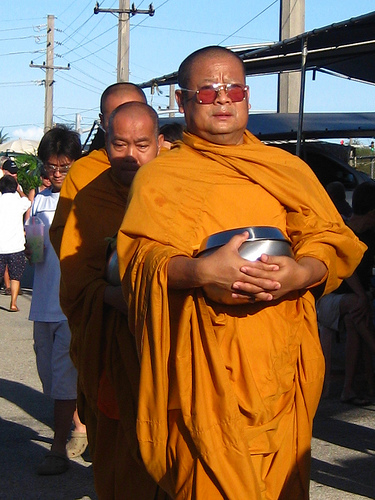

In [ ]:
dataset["test"][300]["image"]

In [ ]:
im = preprocess_image(990,'test')
pred = resnet.predict(im).reshape(2048)
feature = pred.reshape(1, 2048)
caption = predicit_caption(model, token, feature, max_size)
print(caption)

NameError: name 'preprocess_image' is not defined